지하철 추가


In [107]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from backup.module.preprocess import drop_columns

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'AppleGothic'}) # 폰트 설정
plt.rc('font', family='AppleGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

In [108]:
# sys.path를 수정하여 모듈 경로를 설정
import sys
import os
import pandas as pd

# 프로젝트 루트 경로 추가
project_root = os.path.abspath("..")
sys.path.append(project_root)
# 모든 컬럼 출력 설정
# pd.set_option('display.max_columns', None)
# 모든 행 출력 설정
# pd.set_option('display.max_rows', None)

import module

In [109]:
df, df_test_y = module.file_load.load_current_version()

In [110]:
df['is_test'].value_counts()      # train과 test data가 하나로 합쳐진 것을 확인할 수 있습니다.

is_test
0    1097155
1       5607
Name: count, dtype: int64

In [ ]:
module.preprocess.아파트_unique_key_add(df)
df = module.preprocess.단지정보_add(df)

df.columns

In [111]:
df.columns

Index(['index', '시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층',
       '건축년도', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '금리_단기1년전차이',
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분', '평수', '층_그룹', '평수_그룹', '시', '구', '동',
       '아파트ID', '아파트ID거리', 'nearest_park_distance', '가까운공원이름', '가까운공원ID',
       '공원갯수', '공원총면적', '공원생활권점수', '산책로갯수', '산책로총길이', '산책생활권점수', '생태문화길갯수',
       '생태문화길총길이', '생태문화생활권점수', '한강지천길갯수', '한강지

In [112]:
# 결측치가 많거나 필요 없는 컬럼을 정리한다
drop_columns = [
    'index', '시군구',  '본번', '부번', 
      '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드','단지신청일', '금리_단기1년전차이',
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분',  '층_그룹', '평수_그룹', '시',
       '아파트ID', '아파트ID거리', 'nearest_park_distance', '가까운공원이름', 
       '공원갯수', '공원총면적', '공원생활권점수', '산책로갯수', '산책로총길이', '산책생활권점수', '생태문화길갯수',
       '생태문화길총길이', '생태문화생활권점수', '한강지천길갯수', '한강지천길총길이', '한강지천생활권점수', '숲세권종합점수',
       '숲세권등급', '한강거리', '지가지수', '아파트전세_전기대비증감률', '실업률', '민간소비', '소비자심리지수',
       '경제심리지수', '여수신 금리차','계약일','전용면적(㎡)',
]

# 전처리

In [113]:
# module.preprocess.컬럼_정리(df)
df_select = module.preprocess.drop_columns(df, drop_columns)


In [114]:
df_select.columns


Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target', '평수',
       '구', '동', '가까운공원ID', 'is_test'],
      dtype='object')

In [115]:
# df_select = df_select[df_select['계약년월'] > 201701]
module.preprocess.번지_본번_부번_결측채우기(df_select)
# module.preprocess.한강거리_add(df_select)

# 파생변수

In [116]:
# module.preprocess.강남_add(df_select)
module.preprocess.신축_add(df_select)
# module.preprocess.계약_건축년도_차이(df_select)
# 강남 8학군 지역 설정
gangnam_8_schools = ['강남구', '서초구', '송파구']

# 학군 변수 추가: 강남 8학군이면 1, 아니면 0
df_select['학군'] = df_select['구'].apply(lambda x: 1 if x in gangnam_8_schools else 0)


In [117]:
final_drop_columns = []
df_select.drop(final_drop_columns, axis=1, inplace=True)

# Model Training

## 범주형 변수 Encoding

In [118]:
model_data = df_select.copy()
# model_data['한강거리'] = np.log1p(model_data['한강거리'])

In [119]:
model_data.isnull().sum()

번지            0
아파트명          0
계약년월          0
층             0
건축년도          0
도로명           0
좌표X           0
좌표Y           0
target     5607
평수            0
구             0
동             0
가까운공원ID       0
is_test       0
학군            0
dtype: int64

In [120]:
model_data.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target', '평수',
       '구', '동', '가까운공원ID', 'is_test', '학군'],
      dtype='object')

In [121]:
dt_train, dt_test = module.preprocess.split_train_test(model_data)
categorical_columns_v2 = module.preprocess.범주형_filter(dt_train)
label_encoders = module.preprocess.범주형_encoding(dt_train, dt_test, categorical_columns_v2)
print(dt_train.shape, dt_test.shape)

100%|██████████| 6/6 [00:01<00:00,  4.87it/s]

(1097155, 14) (5607, 14)


## Model Training


# 훈련데이터 분할

In [122]:
X_train, X_val, y_train, y_val = module.preprocess.holdout_split_X_y(dt_train)

In [123]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((877724, 13), (219431, 13), (877724,), (219431,))

In [124]:
X_train.head(1)

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,평수,구,동,가까운공원ID,학군
586784,1444,3131,201605,11,1988,4922,127.015602,37.498732,24,14,151,1612,1


In [125]:
# RandomForestRegressor 를 이용해 회귀 모델을 적합시키겠습니다.
model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
# pred = model.predict(X_val)

RandomForestRegressor(n_estimators=5, n_jobs=-1, random_state=1)

In [126]:
# print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

In [127]:
df_test_y.head()

,target
0,210000.0
1,190000.0
2,230000.0
3,185000.0
4,241000.0


In [128]:
X_test = dt_test.drop(['target'], axis=1)

real_test_pred = model.predict(X_test)
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(df_test_y, real_test_pred))}')

RMSE test: 29935.258330094523


In [129]:
X_test.shape, real_test_pred.shape, df_test_y.shape

((5607, 13), (5607,), (5607, 1))

In [130]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

In [131]:
X_val = X_test.reset_index(drop=True)
# real_test_pred.reset_index(drop=True)
X_val

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,평수,구,동,가까운공원ID,학군
0,1678,327,202301,10,1983,4465,127.068028,37.487802,22,0,8,1661,1
1,1665,328,202212,3,1983,471,127.072682,37.489122,25,0,8,1731,1
2,1665,328,202301,10,1983,471,127.072682,37.489122,25,0,8,1731,1
3,728,1933,202210,7,2019,4978,127.064151,37.480049,18,0,8,1691,1
4,728,1933,202212,8,2019,4978,127.064151,37.480049,25,0,8,1691,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,3322,36,202207,4,2021,5352,126.891951,37.584794,25,21,163,747,0
5603,3322,36,202207,6,2021,5352,126.891951,37.584794,25,21,163,747,0
5604,3322,36,202207,7,2021,5352,126.891951,37.584794,25,21,163,747,0
5605,3322,36,202209,4,2021,5352,126.891951,37.584794,25,21,163,747,0


In [132]:
X_val['target'] = df_test_y
X_val['pred'] = real_test_pred
X_val['예측차이'] = X_val['target'] - X_val['pred']
# RMSE 계산
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # 내림차순 sorting

In [133]:
X_val.isnull().sum()

번지         0
아파트명       0
계약년월       0
층          0
건축년도       0
도로명        0
좌표X        0
좌표Y        0
평수         0
구          0
동          0
가까운공원ID    0
학군         0
target     0
pred       0
예측차이       0
error      0
dtype: int64

In [134]:
X_val.sort_values(by='error', ascending=False).head(10)

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,평수,구,동,가까운공원ID,학군,target,pred,예측차이,error
3420,3957,3230,202301,37,2016,4591,127.092204,37.597362,61,24,143,335,0,185000.0,679600.0,-494600.0,2.446292e+11
2201,1104,5894,202212,4,2002,3352,127.002921,37.486202,82,14,151,1578,1,640000.0,256800.0,383200.0,1.468422e+11
3650,4006,221,202208,5,1974,5849,127.020669,37.518772,43,0,181,1669,1,129500.0,423400.0,-293900.0,8.637721e+10
4534,3854,2262,202209,39,2012,6131,126.913938,37.551322,67,12,149,948,0,510000.0,745600.0,-235600.0,5.550736e+10
3679,2969,6413,202207,6,1976,5846,127.027926,37.533027,59,0,196,1708,1,800000.0,582400.0,217600.0,4.734976e+10
3600,3651,4661,202207,1,2003,8664,127.022957,37.513048,39,0,45,1702,1,106000.0,318000.0,-212000.0,4.494400e+10
3272,5798,949,202211,8,2019,8751,127.003365,37.536254,62,20,310,119,0,945000.0,742000.0,203000.0,4.120900e+10
3641,2448,4788,202208,5,2003,4989,127.044329,37.517182,39,0,138,1680,1,210000.0,410000.0,-200000.0,4.000000e+10
3281,37,6747,202301,3,2003,7120,127.013718,37.538466,67,20,310,99,0,430000.0,231040.0,198960.0,3.958508e+10
4810,4503,2901,202207,1,1998,4381,126.992966,37.496919,73,14,112,1640,1,450000.0,266700.0,183300.0,3.359889e+10


In [135]:
X_val.sort_values(by='error', ascending=False).tail(10)

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,평수,구,동,가까운공원ID,학군,target,pred,예측차이,error
4526,23,4121,202209,7,2004,5713,126.942127,37.556259,9,12,42,861,0,25200.0,25200.0,0.0,0.0
721,6259,6291,202212,10,2013,414,126.841934,37.528851,4,3,323,1099,0,8500.0,8500.0,0.0,0.0
5002,576,6271,202207,7,1983,38,127.115050,37.505873,47,17,162,1775,1,199500.0,199500.0,0.0,0.0
22,4077,1429,202301,12,2006,4970,127.048985,37.493029,25,0,63,1677,1,240000.0,240000.0,0.0,0.0
4325,2695,3690,202209,5,2014,1783,127.066152,37.656462,4,8,140,671,0,11000.0,11000.0,0.0,0.0
3859,3791,3790,202207,3,2016,2007,127.022159,37.634345,5,2,166,465,0,11000.0,11000.0,0.0,0.0
1607,3836,3676,202301,13,2013,7632,127.056359,37.566276,4,10,48,280,0,10000.0,10000.0,0.0,0.0
5448,1828,5283,202209,10,2013,1462,127.021307,37.573839,3,22,168,41,0,9700.0,9700.0,0.0,0.0
1641,2657,2507,202210,12,2022,7282,127.059111,37.595186,5,10,247,295,0,23000.0,23000.0,0.0,0.0
5548,285,3233,202208,8,2021,4106,127.087754,37.593696,5,24,143,364,0,30500.0,30500.0,0.0,0.0


In [136]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # 예측을 잘 하지못한 top 100개의 data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # 예측을 잘한 top 100개의 data

In [137]:
# 해석을 위해 레이블인코딩 된 변수를 복원해줍니다.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [138]:
error_top100.to_csv('top50_error_단지_클러스터.csv', index=False)
best_top100.to_csv('tail50_top_단지_클러스터.csv', index=False)

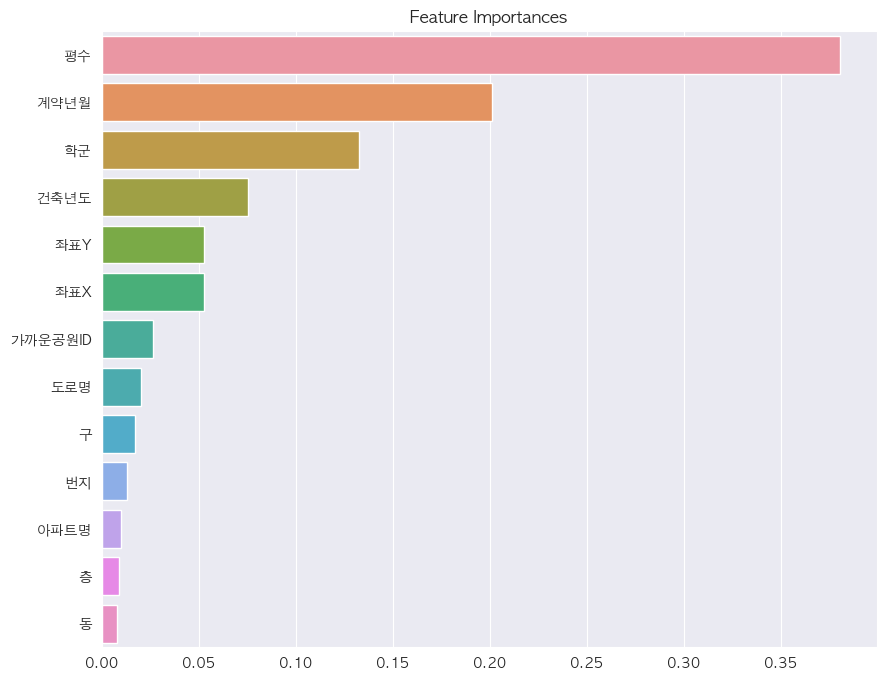

In [139]:
# 위 feature importance를 시각화해봅니다.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [141]:
error_top100.isnull().sum()

번지         0
아파트명       0
계약년월       0
층          0
건축년도       0
도로명        0
좌표X        0
좌표Y        0
평수         0
구          0
동          0
가까운공원ID    0
학군         0
target     0
pred       0
예측차이       0
error      0
dtype: int64

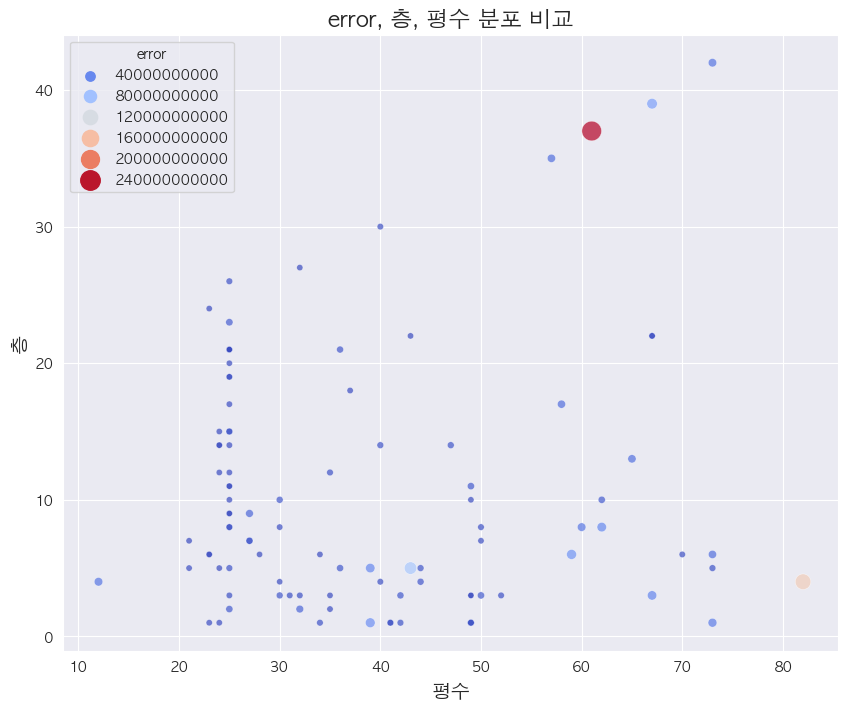

In [143]:
# 2D 히트맵으로 target, 층, 전용면적의 분포 비교
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=error_top100, 
    x='평수', 
    y='층', 
    size='error', 
    hue='error', 
    palette='coolwarm', 
    alpha=0.7, 
    sizes=(20, 200)
)
plt.title('error, 층, 평수 분포 비교', fontsize=16)
plt.xlabel('평수', fontsize=14)
plt.ylabel('층', fontsize=14)
plt.legend(title='error')
plt.grid(True)
plt.show()

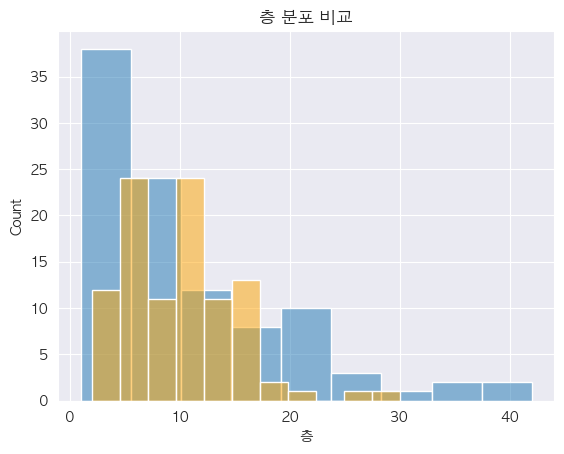

In [145]:
sns.histplot(data = error_top100, x='층', alpha=0.5)
sns.histplot(data = best_top100, x='층', color='orange', alpha=0.5)
plt.title('층 분포 비교')
plt.show()

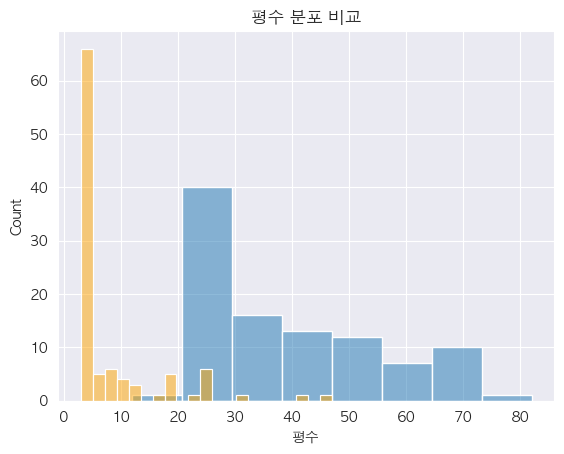

In [146]:
sns.histplot(data = error_top100, x='평수', alpha=0.5)
sns.histplot(data = best_top100, x='평수', color='orange', alpha=0.5)
plt.title('평수 분포 비교')
plt.show()

In [147]:
error_top100

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,평수,구,동,가까운공원ID,학군,target,pred,예측차이,error
3420,501,상봉듀오트리스,202301,37,2016,상봉로 131,127.092204,37.597362,61,중랑구,상봉동,P00566,0,185000.0,679600.0,-494600.0,2.446292e+11
2201,1496-24,트라움하우스3,202212,4,2002,명달로 97-14,127.002921,37.486202,82,서초구,서초동,P02373,1,640000.0,256800.0,383200.0,1.468422e+11
3650,510-11,강남상가,202208,5,1974,압구정로2길 46,127.020669,37.518772,43,강남구,신사동,P02521,1,129500.0,423400.0,-293900.0,8.637721e+10
4534,490,메세나폴리스,202209,39,2012,양화로 45,126.913938,37.551322,67,마포구,서교동,P01499,0,510000.0,745600.0,-235600.0,5.550736e+10
3679,369-1,현대1차,202207,6,1976,압구정로29길 71,127.027926,37.533027,59,강남구,압구정동,P02575,1,800000.0,582400.0,217600.0,4.734976e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,913,헬리오시티,202209,20,2018,송파대로 345,127.102497,37.497610,25,송파구,가락동,P02725,1,138000.0,216400.0,-78400.0,6.146560e+09
111,944-6,대명비발디,202212,6,2003,도곡로6길 18,127.034294,37.489120,23,강남구,도곡동,P02649,1,96500.0,174700.0,-78200.0,6.115240e+09
3743,122-15,청담대우멤버스카운티11차,202207,3,2004,도산대로87길 23,127.049974,37.526148,49,강남구,청담동,P02577,1,315000.0,237000.0,78000.0,6.084000e+09
2747,17,파크리오,202301,9,2008,올림픽로 435,127.106151,37.520537,25,송파구,신천동,P02701,1,172000.0,250000.0,-78000.0,6.084000e+09


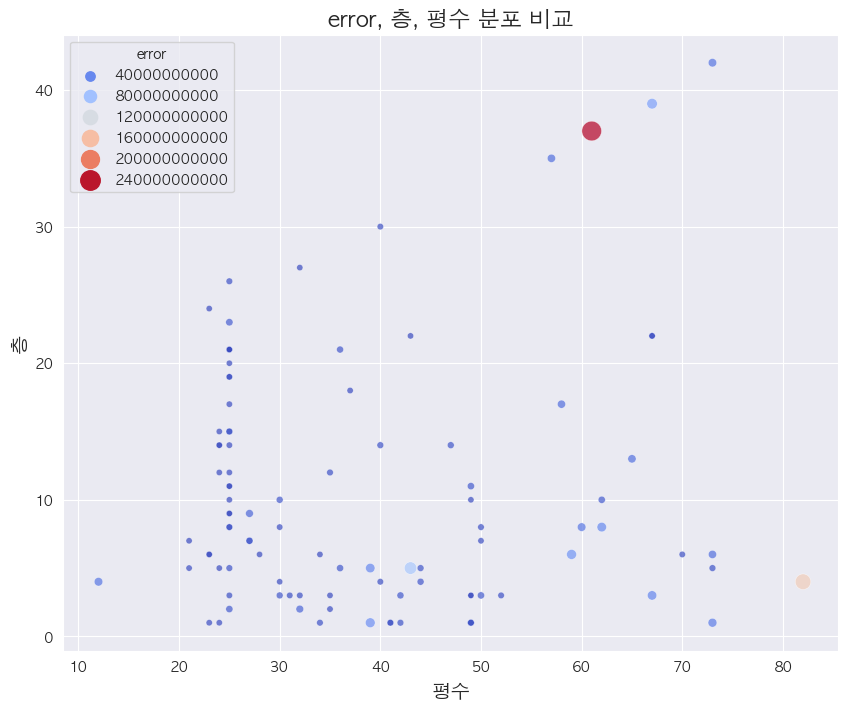

In [148]:
# 2D 히트맵으로 target, 층, 전용면적의 분포 비교
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=error_top100, 
    x='평수', 
    y='층', 
    size='error', 
    hue='error', 
    palette='coolwarm', 
    alpha=0.7, 
    sizes=(20, 200)
)
plt.title('error, 층, 평수 분포 비교', fontsize=16)
plt.xlabel('평수', fontsize=14)
plt.ylabel('층', fontsize=14)
plt.legend(title='error')
plt.grid(True)
plt.show()

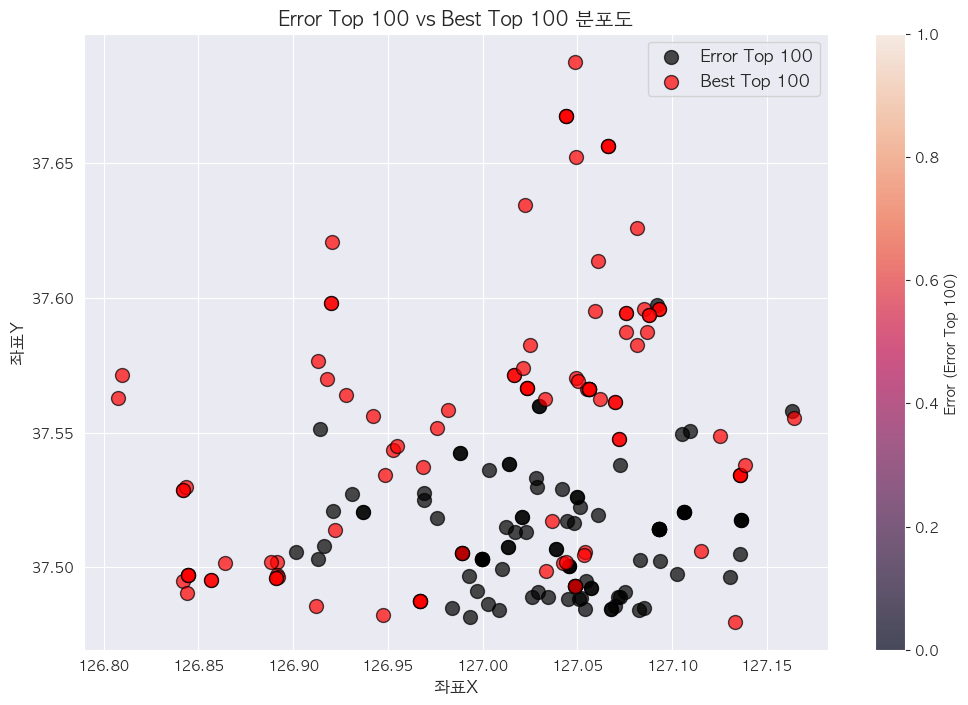

In [149]:

# 그래프 생성
plt.figure(figsize=(12, 8))

# error_top100 산점도
scatter1 = plt.scatter(
    error_top100['좌표X'], error_top100['좌표Y'], 
    c='black',  s=100, edgecolor='k', alpha=0.7, label='Error Top 100'
)

# best_top100 산점도
scatter2 = plt.scatter(
    best_top100['좌표X'], best_top100['좌표Y'], 
    c='red', s=100, edgecolor='k', alpha=0.7, label='Best Top 100'
)

# 컬러바 추가 (error_top100용)
plt.colorbar(scatter1, label='Error (Error Top 100)')

# 축 및 제목 설정
plt.xlabel('좌표X', fontsize=12)
plt.ylabel('좌표Y', fontsize=12)
plt.title('Error Top 100 vs Best Top 100 분포도', fontsize=14)
plt.grid(True)

# 범례 추가
plt.legend(fontsize=12)

# 그래프 표시
plt.show()

In [150]:
error_top100['구'].value_counts()

구
강남구     37
서초구     21
송파구     19
용산구      8
영등포구     7
광진구      3
성동구      2
중랑구      1
마포구      1
강동구      1
Name: count, dtype: int64

In [151]:
error_top100[error_top100['예측차이'] > 100000].value_counts()

번지       아파트명         계약년월    층   건축년도  도로명            좌표X         좌표Y        평수  구     동      가까운공원ID  학군  target    pred      예측차이      error       
1-44     힐탑트레져1동      202207  10  2003  유엔빌리지길 200-16  127.013718  37.538466  62  용산구   한남동    P00198   0   390000.0  267040.0  122960.0  1.511916e+10    1
                      202301  3   2003  유엔빌리지길 200-16  127.013718  37.538466  67  용산구   한남동    P00198   0   430000.0  231040.0  198960.0  3.958508e+10    1
1496-24  트라움하우스3      202212  4   2002  명달로 97-14      127.002921  37.486202  82  서초구   서초동    P02373   1   640000.0  256800.0  383200.0  1.468422e+11    1
189      개포주공4단지      202301  4   1982  삼성로 14         127.069985  37.485699  12  강남구   개포동    P02509   1   370000.0  196400.0  173600.0  3.013696e+10    1
193-1    힐데스하임빌라      202207  6   1998  남부순환로377길 26   127.045027  37.488125  73  강남구   도곡동    P02556   1   500000.0  338400.0  161600.0  2.611456e+10    1
21-1     서울           202207  8   1976  여의나루로 121      126.931151  37

In [152]:
error_top100.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', '평수', '구', '동',
       '가까운공원ID', '학군', 'target', 'pred', '예측차이', 'error'],
      dtype='object')